In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('./weatherHistory.csv')
data.shape

(96453, 12)

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
#finding the duplicates in the data
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [7]:
#finding the number of null values in each feature
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [18]:
#there is high no. of null values in Precip Type feature so dropping all the null values doesn't suit in 
#this case so just dropping Precip Type column
data = data.drop(['Precip Type'], axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.1+ MB


In [21]:
##PLOTS

Text(0, 0.5, 'Humidity')

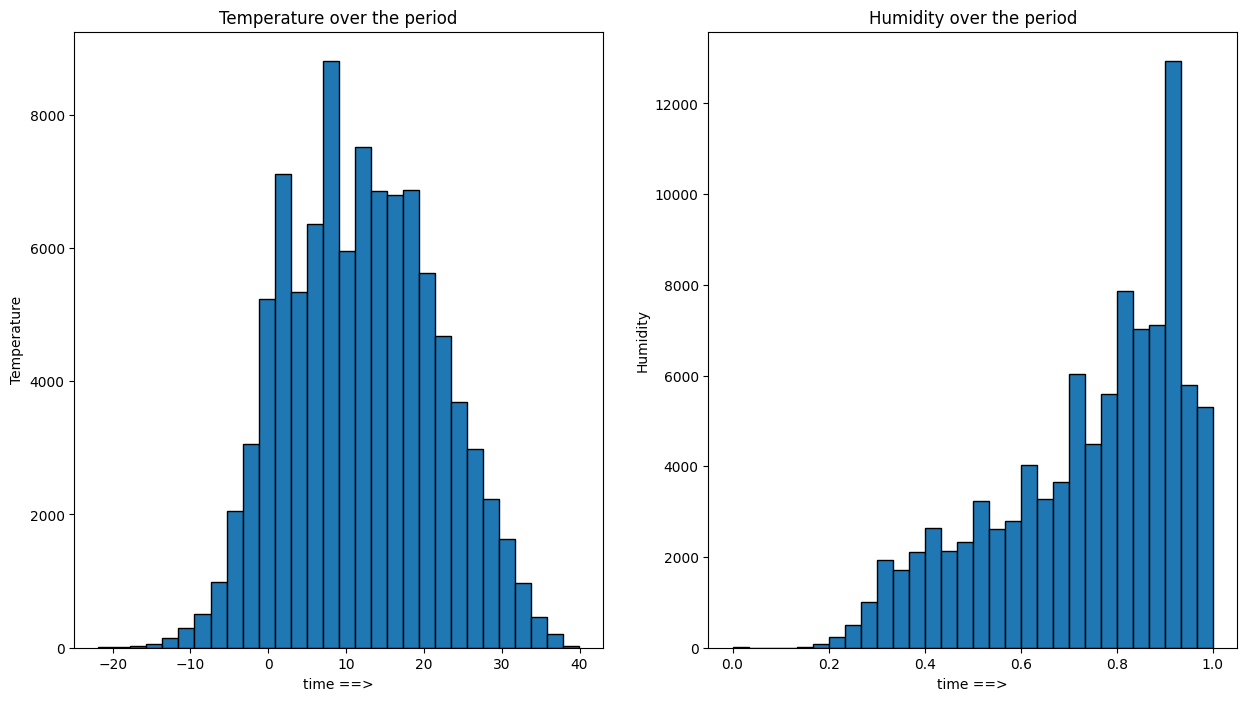

In [35]:
plt.figure(figsize=(15,8))

#temperature and humidity plots
plt.subplot(1,2,1)
data['Temperature (C)'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Temperature over the period')
plt.xlabel('time ==>')
plt.ylabel('Temperature')

plt.subplot(1,2,2)
data['Humidity'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Humidity over the period')
plt.xlabel('time ==>')
plt.ylabel('Humidity')

Text(0, 0.5, 'wind bearing')

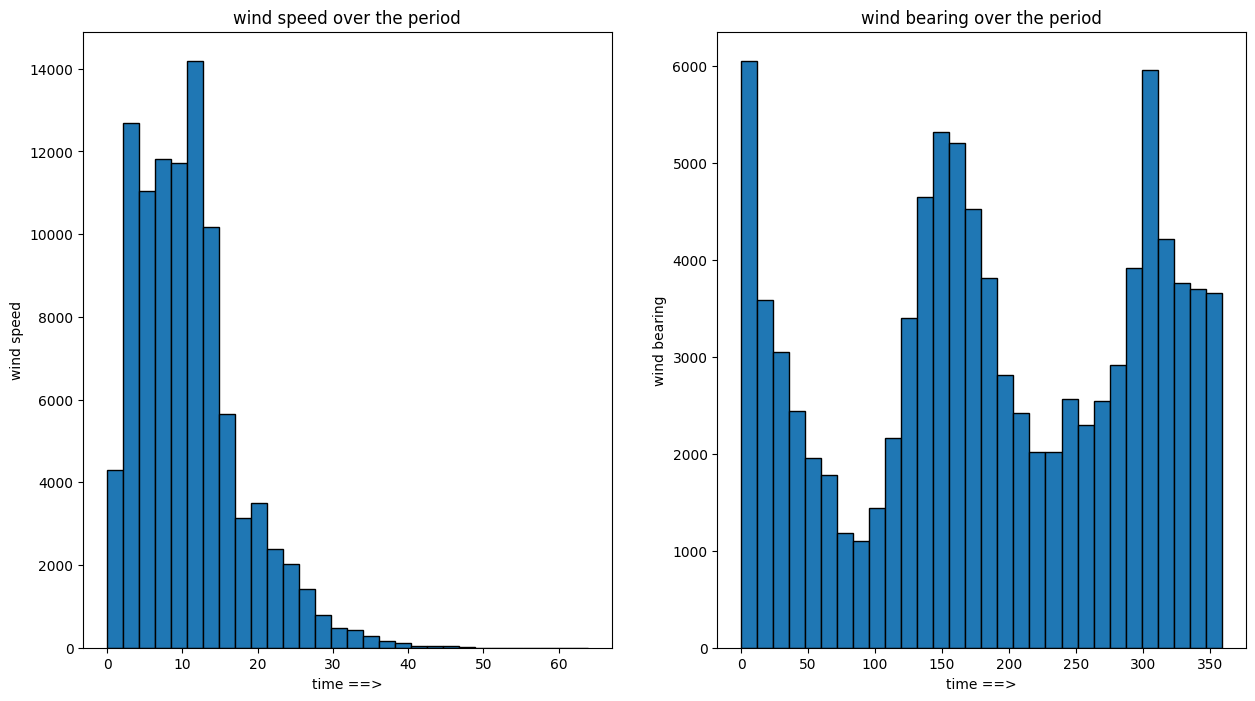

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data['Wind Speed (km/h)'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('wind speed over the period')
plt.xlabel('time ==>')
plt.ylabel('wind speed')

plt.subplot(1,2,2)
data['Wind Bearing (degrees)'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('wind bearing over the period')
plt.xlabel('time ==>')
plt.ylabel('wind bearing')

/tmp/ipykernel_178152/2134858011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Summary', y='Temperature (C)', palette='Set3')


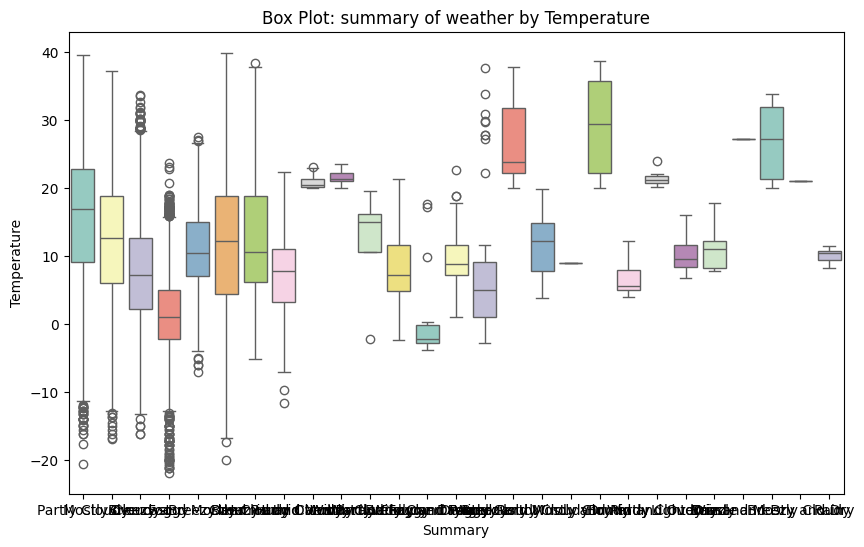

In [40]:

# Box Plot: Age distribution by Reason
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Summary', y='Temperature (C)', palette='Set3')
plt.title('Box Plot: summary of weather by Temperature')
plt.xlabel('Summary')
plt.ylabel('Temperature')
plt.show()

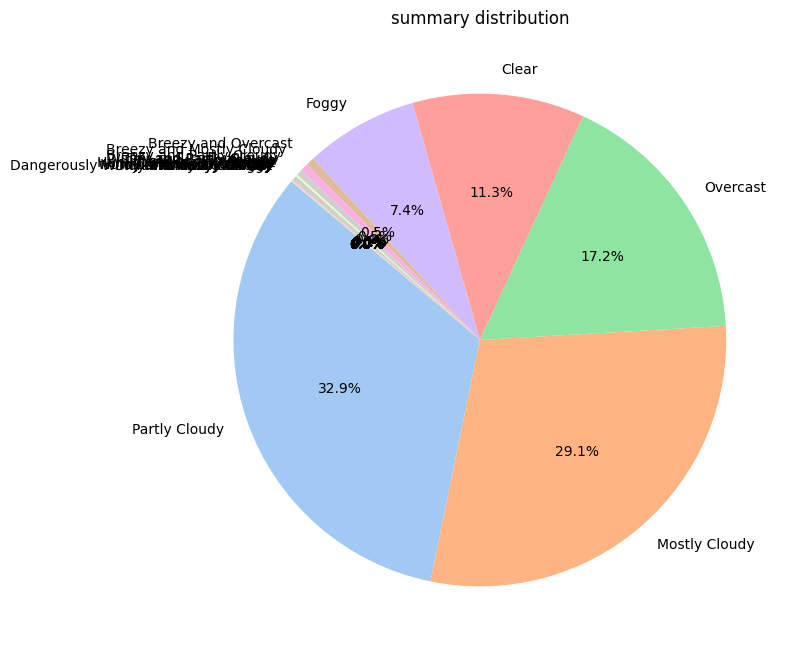

In [44]:
#pie chart
Summary_numbers = data['Summary'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Summary_numbers, labels=Summary_numbers.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('summary distribution')
plt.show()


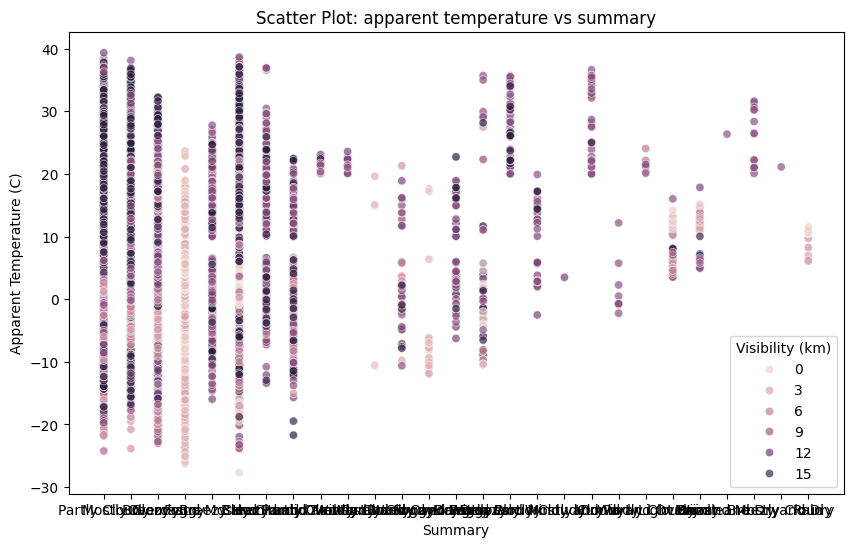

In [47]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Summary', y='Apparent Temperature (C)', hue='Visibility (km)', alpha=0.7)
plt.title('Scatter Plot: apparent temperature vs summary')
plt.xlabel('Summary')
plt.ylabel('Apparent Temperature (C)')
plt.show()   

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.1+ MB


In [55]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
df_heatmap = df.pivot("Apparent Temperature (C)", "Humidity")
sns.heatmap(df_heatmap)
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 3 were given

<Figure size 1200x800 with 0 Axes>